# Hands-On

Você foi designado para realizar a limpeza e preparação de dados de dois conjuntos de dados (base1.csv e base2.csv) distintos que representam informações relacionadas a risco de crédito.

Seu objetivo é ler os dois conjuntos de dados usando a biblioteca Pandas, realizar a concatenação dos dados, lidar com valores duplicados e faltantes, além de verificar a presença de outliers nos dados combinados.

____

## Passos a serem seguidos:

1. **Leitura dos Arquivos:** Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.
2. **Concatenação dos Dados:** Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada.
3. **Tratamento de Dados Duplicados:** Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência.
4. **Tratamento de Valores Faltantes:** Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados.
5. **Verificação de Outliers:** Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma.

Leitura dos Arquivos: Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.

In [0]:
import pandas as pd

# Comando para ler os arquivos
df_base1 = pd.read_csv("/Workspace/Repos/caiquer@unimedcampinas.com.br/ADA_classes/DS-PY-Data-Science/DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY)/Material do Aluno/datasets/base1.csv")
df_base2 = pd.read_csv("/Workspace/Repos/caiquer@unimedcampinas.com.br/ADA_classes/DS-PY-Data-Science/DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY)/Material do Aluno/datasets/base2.csv")

Concatenação dos Dados: Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada.

In [0]:
# Verificar se os dados possuem a mesma estrutura
print(df_base1.shape)
print(df_base2.shape)

if df_base1.shape[1] == df_base2.shape[1]:
    print("Os DataFrames possuem a mesma estrutura e podem ser concatenados")
else:
    print("Os DataFrames não possuem a mesma estrutura e não podem ser concatenados")

df_dados = pd.concat([df_base1, df_base2], ignore_index=True) # Concatenando os DataFrames

(670, 12)
(330, 12)
Os DataFrames possuem a mesma estrutura e podem ser concatenados


Tratamento de Dados Duplicados: Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência.

In [0]:
print(f'Existem {df_dados.duplicated().sum()} linhas duplicadas no DataFrame concatenado') # Verificar se há linhas duplicadas no DataFrame combinado

df_dados = df_dados.drop_duplicates() # Não existem linhas duplicadas, mas caso elas sejam inseridas, basta removê-las com esta linha

Existem 0 linhas duplicadas no DataFrame concatenado


Tratamento de Valores Faltantes: Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados.

In [0]:
print(df_dados.isnull().sum()) # Verificar o número de valores faltantes em cada coluna

# As colunas "Saving accounts" e "Checking account" possuem valores faltantes

df_dados["Saving accounts"] = pd.to_numeric(df_dados["Saving accounts"], errors="coerce") # Troca os valores não numéricos por numéricos
df_dados["Saving accounts"].fillna(df_dados["Saving accounts"].mean(), inplace=True) # Preencher os valores faltantes na coluna "Saving Accounts" com a média
df_dados["Checking account"].fillna(0, inplace=True) # Preencher os valores faltantes na coluna "Checking Account" com o valor 0

Unnamed: 0.1          0
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


Verificação de Outliers: Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma.

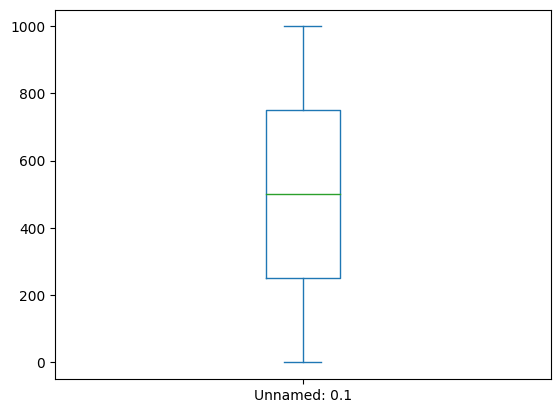

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1661549441160774>, line 4
      2 for col in df_dados.select_dtypes(include=["float64", "int64"]).columns:
      3     df_dados[col].plot(kind="box")
----> 4     plt.show()
      6 # Os boxplots indicam a presença de outliers nas colunas "idade", "renda" e "tempo_empregado"
      7 
      8 # Remover os outliers nas colunas "idade" e "renda"
      9 def remove_outliers(df, col):
     10     # Definir os limites superior e inferior para os outliers

NameError: name 'plt' is not defined

In [0]:
# Visualizar o boxplot das colunas numéricas
for col in df_dados.select_dtypes(include=["float64", "int64"]).columns:
    df_dados[col].plot(kind="box")
    plt.show()

# Remover os outliers das colunas
def remove_outliers(df, col):
    lim_superior = df[col].quantile(0.95)
    lim_inferior = df[col].quantile(0.05)

    df = df.query(f"{col} >= {lim_inferior} and {col} <= {lim_superior}") # Remover as linhas fora dos limites
    return df

df_dados = remove_outliers(df_dados, "Saving accounts")
df_dados = remove_outliers(df_dados, "Checking account")